#import necessary libraries

using google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


using google sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

pandas library

In [ ]:
import pandas as pd

#import dataset

gsheets

In [ ]:
group_laptop_gsheets = gc.open_by_key('1o5AjegRxt2ASnJBIiYQZNNw4qTkRTQoXRZUIB85cXC8').sheet1

In [ ]:
header = group_laptop_gsheets.get_all_values()

In [ ]:
#convert and render
df_laptop = pd.DataFrame.from_records(header[1:], columns = header[0])
display(df_laptop.head(3))#truncate

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575


csv encoding

In [ ]:
df_laptop = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/laptop_price.csv',encoding='ISO-8859–1')
display(df_laptop)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


#pre processing

quality assessment

In [ ]:
df_laptop.columns = df_laptop.columns.str.lower()

In [ ]:
display(df_laptop.isnull().sum())

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
display(df_laptop.dtypes)

laptop_ID           object
Company             object
Product             object
TypeName            object
Inches              object
ScreenResolution    object
Cpu                 object
Ram                 object
Memory              object
Gpu                 object
OpSys               object
Weight              object
Price_euros         object
dtype: object

In [ ]:
display(df_laptop.describe())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,1303,19,618,6,18,40,118,9,39,106,9,179,791
top,1,Dell,XPS 13,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,1499
freq,1,297,30,727,665,507,190,619,412,282,1072,121,14


In [ ]:
df_laptop.shape

(1303, 13)

In [ ]:
df_laptop.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [ ]:
display(df_laptop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   laptop_ID         1303 non-null   object
 1   Company           1303 non-null   object
 2   Product           1303 non-null   object
 3   TypeName          1303 non-null   object
 4   Inches            1303 non-null   object
 5   ScreenResolution  1303 non-null   object
 6   Cpu               1303 non-null   object
 7   Ram               1303 non-null   object
 8   Memory            1303 non-null   object
 9   Gpu               1303 non-null   object
 10  OpSys             1303 non-null   object
 11  Weight            1303 non-null   object
 12  Price_euros       1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


None

In [ ]:
#column list to display unique values
columns_to_display = ['company','typename', 'ram', 'opsys', 'memory']

#loop to display unique values
for column in columns_to_display:
    unique_values = df_laptop[column].unique()
    print(f"Unique values of '{column}': {unique_values}")

Unique values of 'company': ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Unique values of 'typename': ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Unique values of 'ram': ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Unique values of 'opsys': ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique values of 'memory': ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB S

In [ ]:
#column list to display unique value counts
columns_to_count = ['company', 'product', 'typename', 'inches', 'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight', 'price_euros']

#loop to display unique value count
for column in columns_to_count:
    unique_count = len(df_laptop[column].unique())
    print(f"unique values in '{column}': {unique_count}")

unique values in 'company': 19
unique values in 'product': 618
unique values in 'typename': 6
unique values in 'inches': 18
unique values in 'screenresolution': 40
unique values in 'cpu': 118
unique values in 'ram': 9
unique values in 'memory': 39
unique values in 'gpu': 110
unique values in 'opsys': 9
unique values in 'weight': 179
unique values in 'price_euros': 791


In [ ]:
display(df_laptop.nunique())

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

cleaning

In [ ]:
df_laptop.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [ ]:
#clean df is copy of laptop df
df_clean = df_laptop.copy()

#set 'laptop_id' as index
df_clean.set_index('laptop_id', inplace=True)

display(df_clean)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
laptop_id,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [ ]:
#separation of values and string from 'screenresolution'
#split screenresolution into x_resolution, y_resolution and screen_type then set values to integers
df_clean['x_resolution'] = df_clean['screenresolution'].apply(lambda x: int(''.join(filter(str.isdigit, x.split('x')[0]))) if isinstance(x, str) else None)
df_clean['y_resolution'] = df_clean['screenresolution'].apply(lambda x: int(''.join(filter(str.isdigit, x.split('x')[1].split()[0]))) if isinstance(x, str) else None)
df_clean['screen_type'] = df_clean['screenresolution'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)) if isinstance(x, str) else '')

#calculation of pixel per inch
df_clean['ppi'] = ((df_clean['x_resolution'].astype(int) ** 2 + df_clean['y_resolution'].astype(int) ** 2) ** 0.5 / df_clean['inches']).round(2)

In [ ]:
#from screen_type
#make'touchscreen' column (1 for yes, 0 for not)
df_clean['touch_screen'] = df_clean['screen_type'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

#make'ips' column (1 for yes, 0 for not)
df_clean['ips'] = df_clean['screen_type'].apply(lambda x: 1 if 'IPS' in x else 0)

#leave rest
df_clean['screen_type'] = df_clean['screen_type'].apply(lambda x: x.strip())

In [ ]:
#from cpu
#seperate vendor, types and clcok speed
df_clean['cpu_vendor'] = df_clean['cpu'].apply(lambda x: x.split()[0] if isinstance(x, str) else '')
df_clean['cpu_type'] = df_clean['cpu'].apply(lambda x: ' '.join(x.split()[:-1]) if 'GHz' in x else x)
df_clean['cpu_clock_speed'] = df_clean['cpu'].apply(lambda x: float(x.split()[-1].replace('GHz', '')) if 'GHz' in x else '')

In [ ]:
#ram size and unit in name
df_clean['ram_gb'] = df_clean['ram'].apply(lambda x: float(x.replace('GB', '')) if isinstance(x, str) else '')

In [ ]:
#from memory
#make memory size, turn gb and tb into float
df_clean['storage_gb'] = df_clean['memory'].apply(lambda x: float(x.split()[0].replace('GB', '')) if 'GB' in x else (float(x.split()[0].replace('TB', '')) * 1024)
if 'TB' in x else None if isinstance(x, str) else '')
#make memory type
df_clean['storage_type'] = df_clean['memory'].apply(lambda x: ' '.join(x.split()[1:]) if isinstance(x, str) else '')

In [ ]:
#from gpu
#add vendor and type
df_clean['gpu_vendor'] = df_clean['gpu'].apply(lambda x: x.split()[0] if isinstance(x, str) else '')
df_clean['gpu_type'] = df_clean['gpu'].apply(lambda x: ' '.join(x.split()[1:]) if isinstance(x, str) else '')

In [ ]:
#from weight
#keep only value and chage data type
df_clean['weight_kg'] = df_clean['weight'].apply(lambda x: float(x.replace('kg', '')) if isinstance(x, str) else '')

In [ ]:
#change to float
df_clean['price_euros'] = df_clean['price_euros'].apply(lambda x: float(x) if isinstance(x, str) else x)

In [ ]:
#pick necessary columns
df_clean = df_clean[['company', 'typename', 'inches', 'touch_screen', 'ips', 'cpu_vendor', 'cpu_type', 'cpu_clock_speed',
                             'ram_gb', 'storage_gb', 'storage_type', 'gpu_vendor', 'gpu_type', 'weight_kg', 'opsys', 'price_euros',
                             'x_resolution', 'y_resolution', 'ppi', 'screen_type']]

In [ ]:
#rename columns
df_clean.rename(columns={'typename': 'type_name', 'opsys': 'op_sys', 'x_resolution': 'x_resolution', 'y_resolution': 'y_resolution',
                             'screen_type': 'screen_type'}, inplace=True)

<ipython-input-22-1f2bf5e9b925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'typename': 'type_name', 'opsys': 'op_sys', 'x_resolution': 'x_resolution', 'y_resolution': 'y_resolution',


In [ ]:
#check cleaned df
display(df_clean)

,company,type_name,inches,touch_screen,ips,cpu_vendor,cpu_type,cpu_clock_speed,ram_gb,storage_gb,storage_type,gpu_vendor,gpu_type,weight_kg,op_sys,price_euros,x_resolution,y_resolution,ppi,screen_type
laptop_id,,,,,,,,,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus Graphics 640,1.37,macOS,1339.69,2560,1600,226.98,IPS Panel Retina Display x
2,Apple,Ultrabook,13.3,0,0,Intel,Intel Core i5,1.8,8.0,128.0,Flash Storage,Intel,HD Graphics 6000,1.34,macOS,898.94,1440,900,127.68,x
3,HP,Notebook,15.6,0,0,Intel,Intel Core i5 7200U,2.5,8.0,256.0,SSD,Intel,HD Graphics 620,1.86,No OS,575.00,1920,1080,141.21,Full HD x
4,Apple,Ultrabook,15.4,0,1,Intel,Intel Core i7,2.7,16.0,512.0,SSD,AMD,Radeon Pro 455,1.83,macOS,2537.45,2880,1800,220.53,IPS Panel Retina Display x
5,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus Graphics 650,1.37,macOS,1803.60,2560,1600,226.98,IPS Panel Retina Display x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,1,1,Intel,Intel Core i7 6500U,2.5,4.0,128.0,SSD,Intel,HD Graphics 520,1.80,Windows 10,638.00,1920,1080,157.35,IPS Panel Full HD / Touchscreen x
1317,Lenovo,2 in 1 Convertible,13.3,1,1,Intel,Intel Core i7 6500U,2.5,16.0,512.0,SSD,Intel,HD Graphics 520,1.30,Windows 10,1499.00,3200,1800,276.05,IPS Panel Quad HD+ / Touchscreen x
1318,Lenovo,Notebook,14.0,0,0,Intel,Intel Celeron Dual Core N3050,1.6,2.0,64.0,Flash Storage,Intel,HD Graphics,1.50,Windows 10,229.00,1366,768,111.94,x


In [ ]:
#check for missing indexes
missing_indices = set(range(df_clean.index.min(), df_clean.index.max() + 1)) - set(df_clean.index)
sorted_missing_indices = sorted(list(missing_indices))
print("missing indices:", sorted_missing_indices)

missing indices: [65, 101, 162, 214, 328, 398, 638, 756, 850, 861, 907, 921, 929, 1078, 1152, 1158, 1159]


In [ ]:
#check for data in those missing index
for index in sorted_missing_indices:
    if index in df_clean.index:
        print(f"Index {index}:")
        print(df_clean.loc[index])
    else:
        print(f"Index {index} does not exist in the DataFrame's index and has no data.")

Index 65 does not exist in the DataFrame's index and has no data.
Index 101 does not exist in the DataFrame's index and has no data.
Index 162 does not exist in the DataFrame's index and has no data.
Index 214 does not exist in the DataFrame's index and has no data.
Index 328 does not exist in the DataFrame's index and has no data.
Index 398 does not exist in the DataFrame's index and has no data.
Index 638 does not exist in the DataFrame's index and has no data.
Index 756 does not exist in the DataFrame's index and has no data.
Index 850 does not exist in the DataFrame's index and has no data.
Index 861 does not exist in the DataFrame's index and has no data.
Index 907 does not exist in the DataFrame's index and has no data.
Index 921 does not exist in the DataFrame's index and has no data.
Index 929 does not exist in the DataFrame's index and has no data.
Index 1078 does not exist in the DataFrame's index and has no data.
Index 1152 does not exist in the DataFrame's index and has no 

In [ ]:
#reset index drop the 'laptop_id', reanem the index
df_clean.reset_index(drop=True, inplace=True)
df_clean.index.name = 'id'
display(df_clean)

,company,type_name,inches,touch_screen,ips,cpu_vendor,cpu_type,cpu_clock_speed,ram_gb,storage_gb,storage_type,gpu_vendor,gpu_type,weight_kg,op_sys,price_euros,x_resolution,y_resolution,ppi,screen_type
id,,,,,,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus Graphics 640,1.37,macOS,1339.69,2560,1600,226.98,IPS Panel Retina Display x
1,Apple,Ultrabook,13.3,0,0,Intel,Intel Core i5,1.8,8.0,128.0,Flash Storage,Intel,HD Graphics 6000,1.34,macOS,898.94,1440,900,127.68,x
2,HP,Notebook,15.6,0,0,Intel,Intel Core i5 7200U,2.5,8.0,256.0,SSD,Intel,HD Graphics 620,1.86,No OS,575.00,1920,1080,141.21,Full HD x
3,Apple,Ultrabook,15.4,0,1,Intel,Intel Core i7,2.7,16.0,512.0,SSD,AMD,Radeon Pro 455,1.83,macOS,2537.45,2880,1800,220.53,IPS Panel Retina Display x
4,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus Graphics 650,1.37,macOS,1803.60,2560,1600,226.98,IPS Panel Retina Display x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1,1,Intel,Intel Core i7 6500U,2.5,4.0,128.0,SSD,Intel,HD Graphics 520,1.80,Windows 10,638.00,1920,1080,157.35,IPS Panel Full HD / Touchscreen x
1299,Lenovo,2 in 1 Convertible,13.3,1,1,Intel,Intel Core i7 6500U,2.5,16.0,512.0,SSD,Intel,HD Graphics 520,1.30,Windows 10,1499.00,3200,1800,276.05,IPS Panel Quad HD+ / Touchscreen x
1300,Lenovo,Notebook,14.0,0,0,Intel,Intel Celeron Dual Core N3050,1.6,2.0,64.0,Flash Storage,Intel,HD Graphics,1.50,Windows 10,229.00,1366,768,111.94,x


In [ ]:
display(df_clean.columns)

Index(['company', 'type_name', 'inches', 'touch_screen', 'ips', 'cpu_vendor',
       'cpu_type', 'cpu_clock_speed', 'ram_gb', 'storage_gb', 'storage_type',
       'gpu_vendor', 'gpu_type', 'weight_kg', 'op_sys', 'price_euros',
       'x_resolution', 'y_resolution', 'ppi', 'screen_type'],
      dtype='object')

numpy library nad replace

In [ ]:
import numpy as np
#replace '?' with nan and fill it with 0
df_clean.replace('?', np.nan).fillna(0, inplace=True)

In [ ]:
display(df_clean.describe())

,inches,touch_screen,ips,cpu_clock_speed,ram_gb,storage_gb,weight_kg,price_euros,x_resolution,y_resolution,ppi
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,0.147352,0.280123,2.298772,8.382195,447.809670,2.038734,1123.686992,3214.815042,1070.830391,233.585257
std,1.426304,0.354593,0.449231,0.506340,5.084665,366.037159,0.665475,699.009043,7515.455098,284.519410,502.100167
min,10.100000,0.000000,0.000000,0.900000,2.000000,8.000000,0.690000,174.000000,1366.000000,768.000000,90.580000
25%,14.000000,0.000000,0.000000,2.000000,4.000000,256.000000,1.500000,599.000000,1600.000000,900.000000,127.340000
50%,15.600000,0.000000,0.000000,2.500000,8.000000,256.000000,2.040000,977.000000,1920.000000,1080.000000,141.210000
75%,15.600000,0.000000,1.000000,2.700000,8.000000,512.000000,2.300000,1487.880000,1920.000000,1080.000000,157.350000
max,18.400000,1.000000,1.000000,3.600000,64.000000,2048.000000,4.700000,6099.000000,43840.000000,2160.000000,3511.450000


#visualization

seaborn and matplotlib library

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

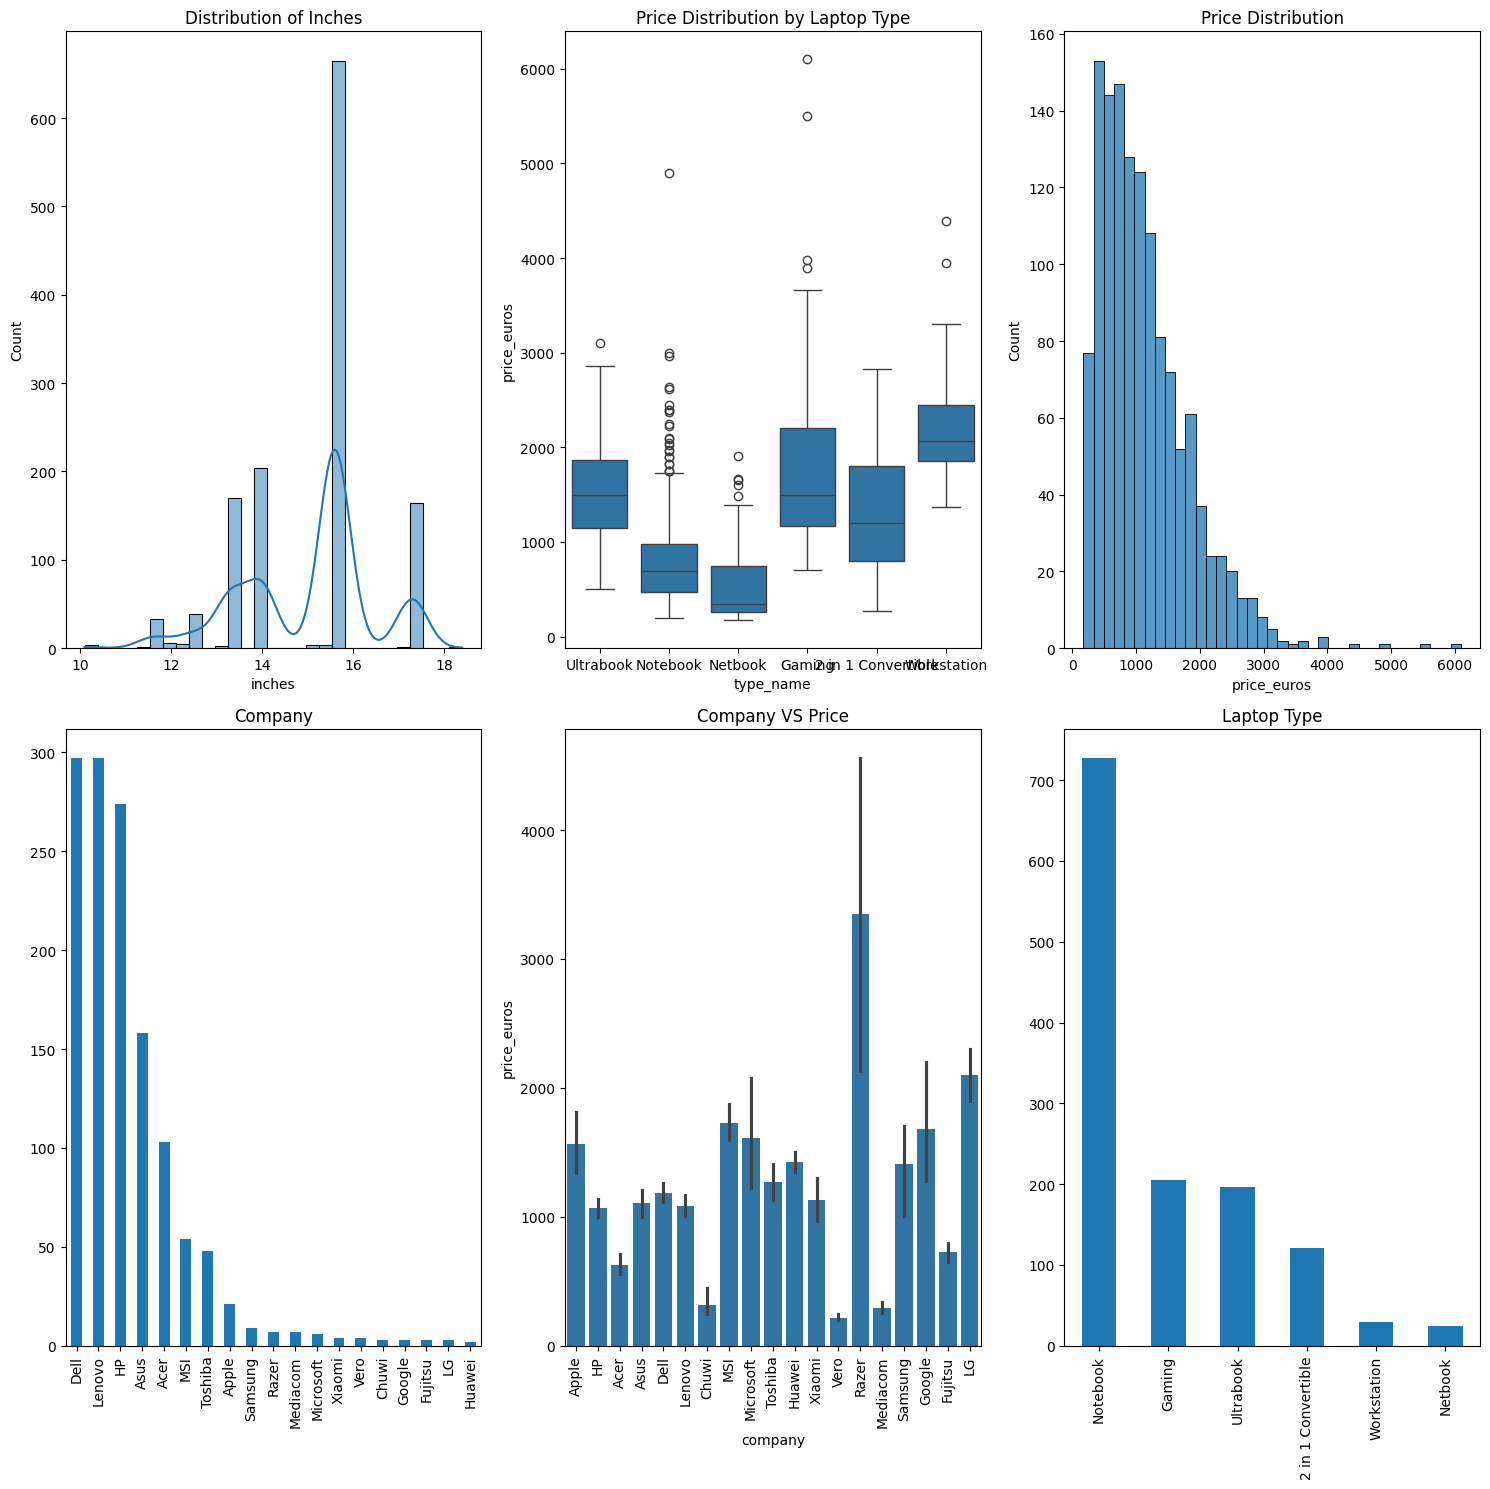

In [ ]:
#size
plt.figure(figsize=(15, 15))

#plot 1
plt.subplot(2, 3, 1)
sns.histplot(data=df_clean, x='inches', kde=True)
plt.title('Distribution of Inches')

#plot 2
plt.subplot(2, 3, 2)
sns.boxplot(data=df_clean, x='type_name', y='price_euros')
plt.title('Price Distribution by Laptop Type')

#plot 3
plt.subplot(2, 3, 3)
sns.histplot(df_clean['price_euros'])
plt.title('Price Distribution')

#plot 4
plt.subplot(2, 3, 4)
df_clean['company'].value_counts().plot(kind = 'bar')
plt.title('Company')

#plot 5
plt.subplot(2, 3, 5)
sns.barplot(x=df_clean['company'],y=df_clean['price_euros'])
plt.xticks(rotation='vertical')
plt.title('Company VS Price')

#plot 6
plt.subplot(2, 3, 6)
df_clean['type_name'].value_counts().plot(kind='bar')
plt.title('Laptop Type')

#display
plt.tight_layout()
plt.show()

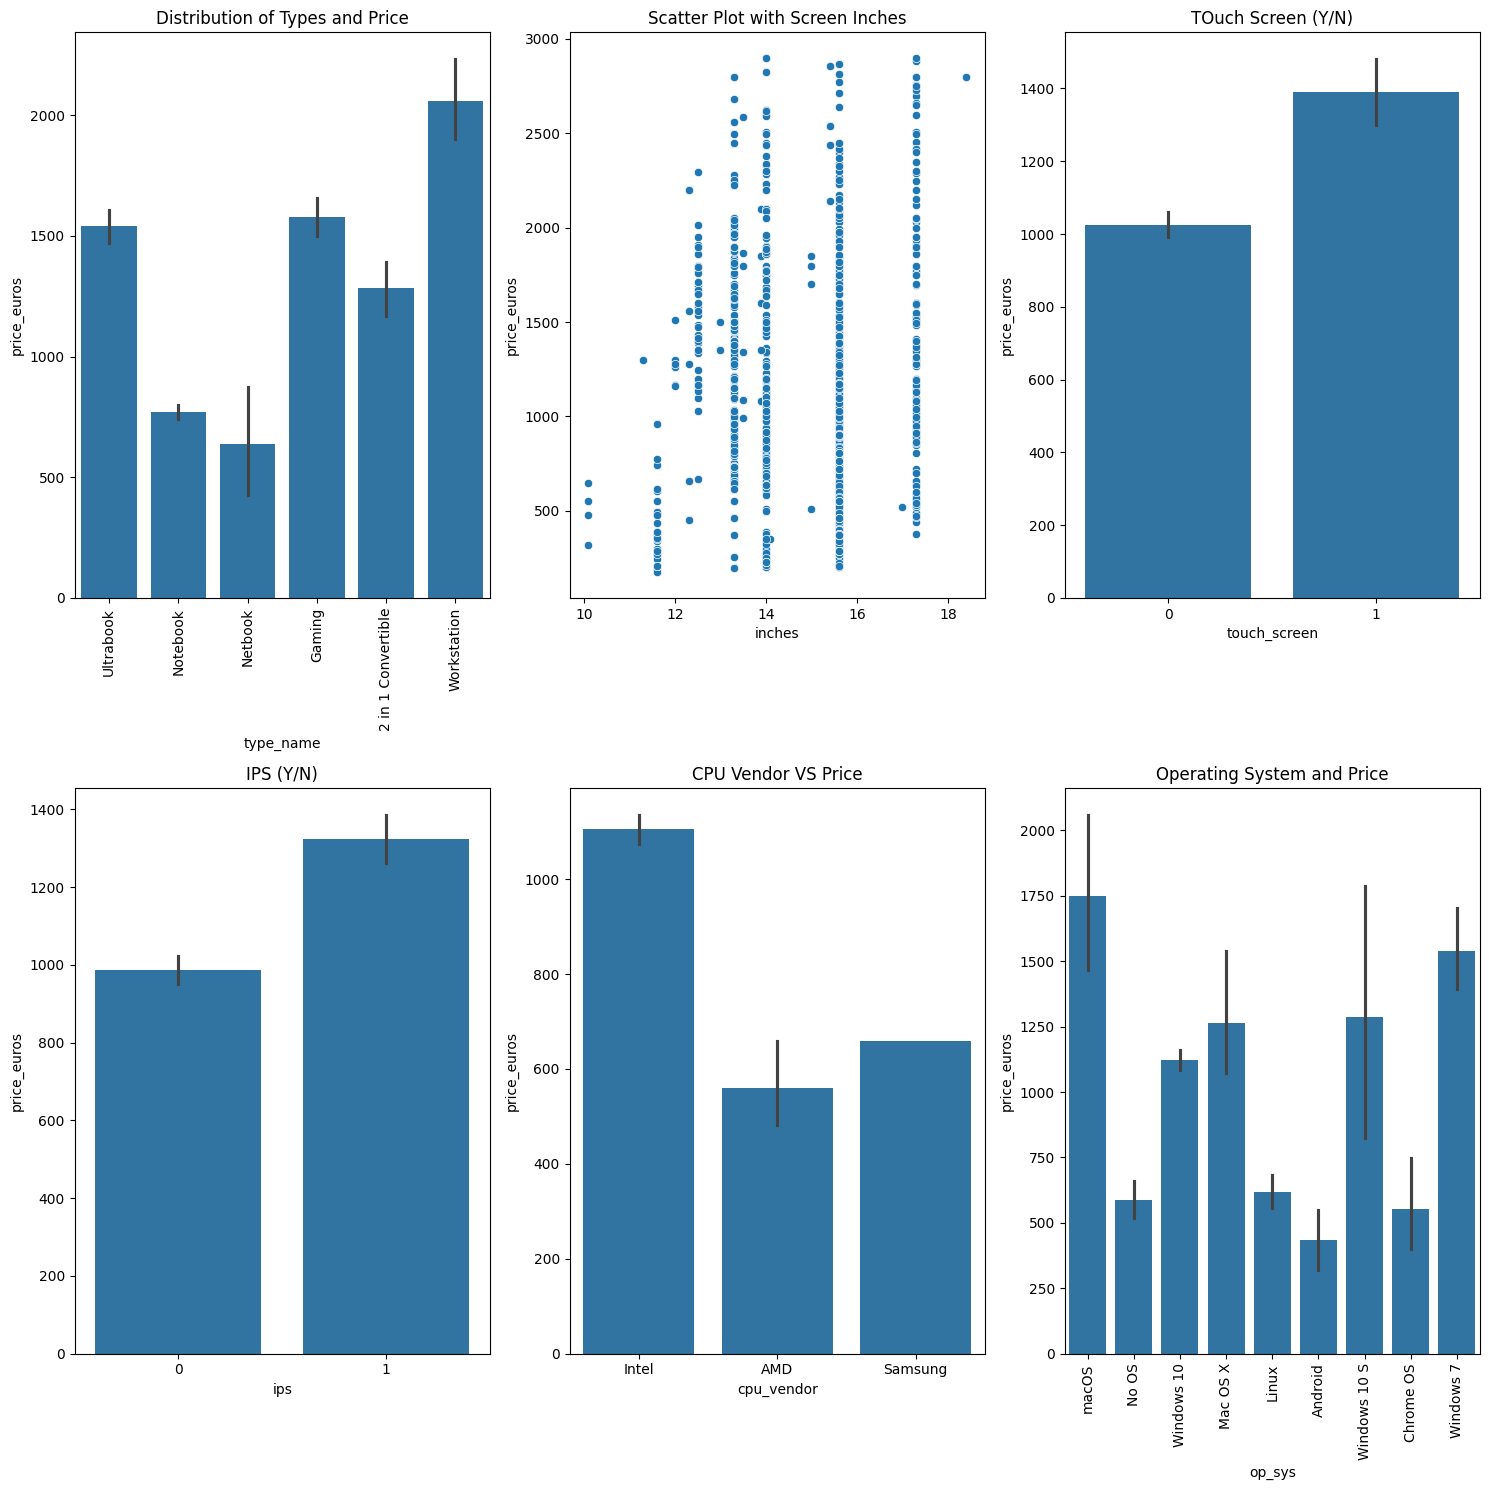

In [92]:
#size
plt.figure(figsize=(15, 15))

#plot 7
plt.subplot(2, 3, 1)
sns.barplot(x=df_clean['type_name'],y=df_clean['price_euros'])
plt.xticks(rotation='vertical')
plt.title('Distribution of Types and Price')

#plot 8
plt.subplot(2, 3, 2)
sns.scatterplot(x=df_clean['inches'],y=df_clean['price_euros'])
plt.title('Scatter Plot with Screen Inches')

#plot 9
plt.subplot(2, 3, 3)
sns.barplot(x=df_clean['touch_screen'],y=df_clean['price_euros'])
plt.title('TOuch Screen (Y/N)')

#plot 10
plt.subplot(2, 3, 4)
sns.barplot(x=df_clean['ips'],y=df_clean['price_euros'])
plt.title('IPS (Y/N)')

#plot 11
plt.subplot(2, 3, 5)
sns.barplot(x=df_clean['cpu_vendor'],y=df_clean['price_euros'])
plt.title('CPU Vendor VS Price')

#plot 12
plt.subplot(2, 3, 6)
sns.barplot(x=df_clean['op_sys'],y=df_clean['price_euros'])
plt.xticks(rotation='vertical')
plt.title('Operating System and Price')

#display
plt.tight_layout()
plt.show()

<ipython-input-94-9b2e188ddf03>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_clean['price_euros']))


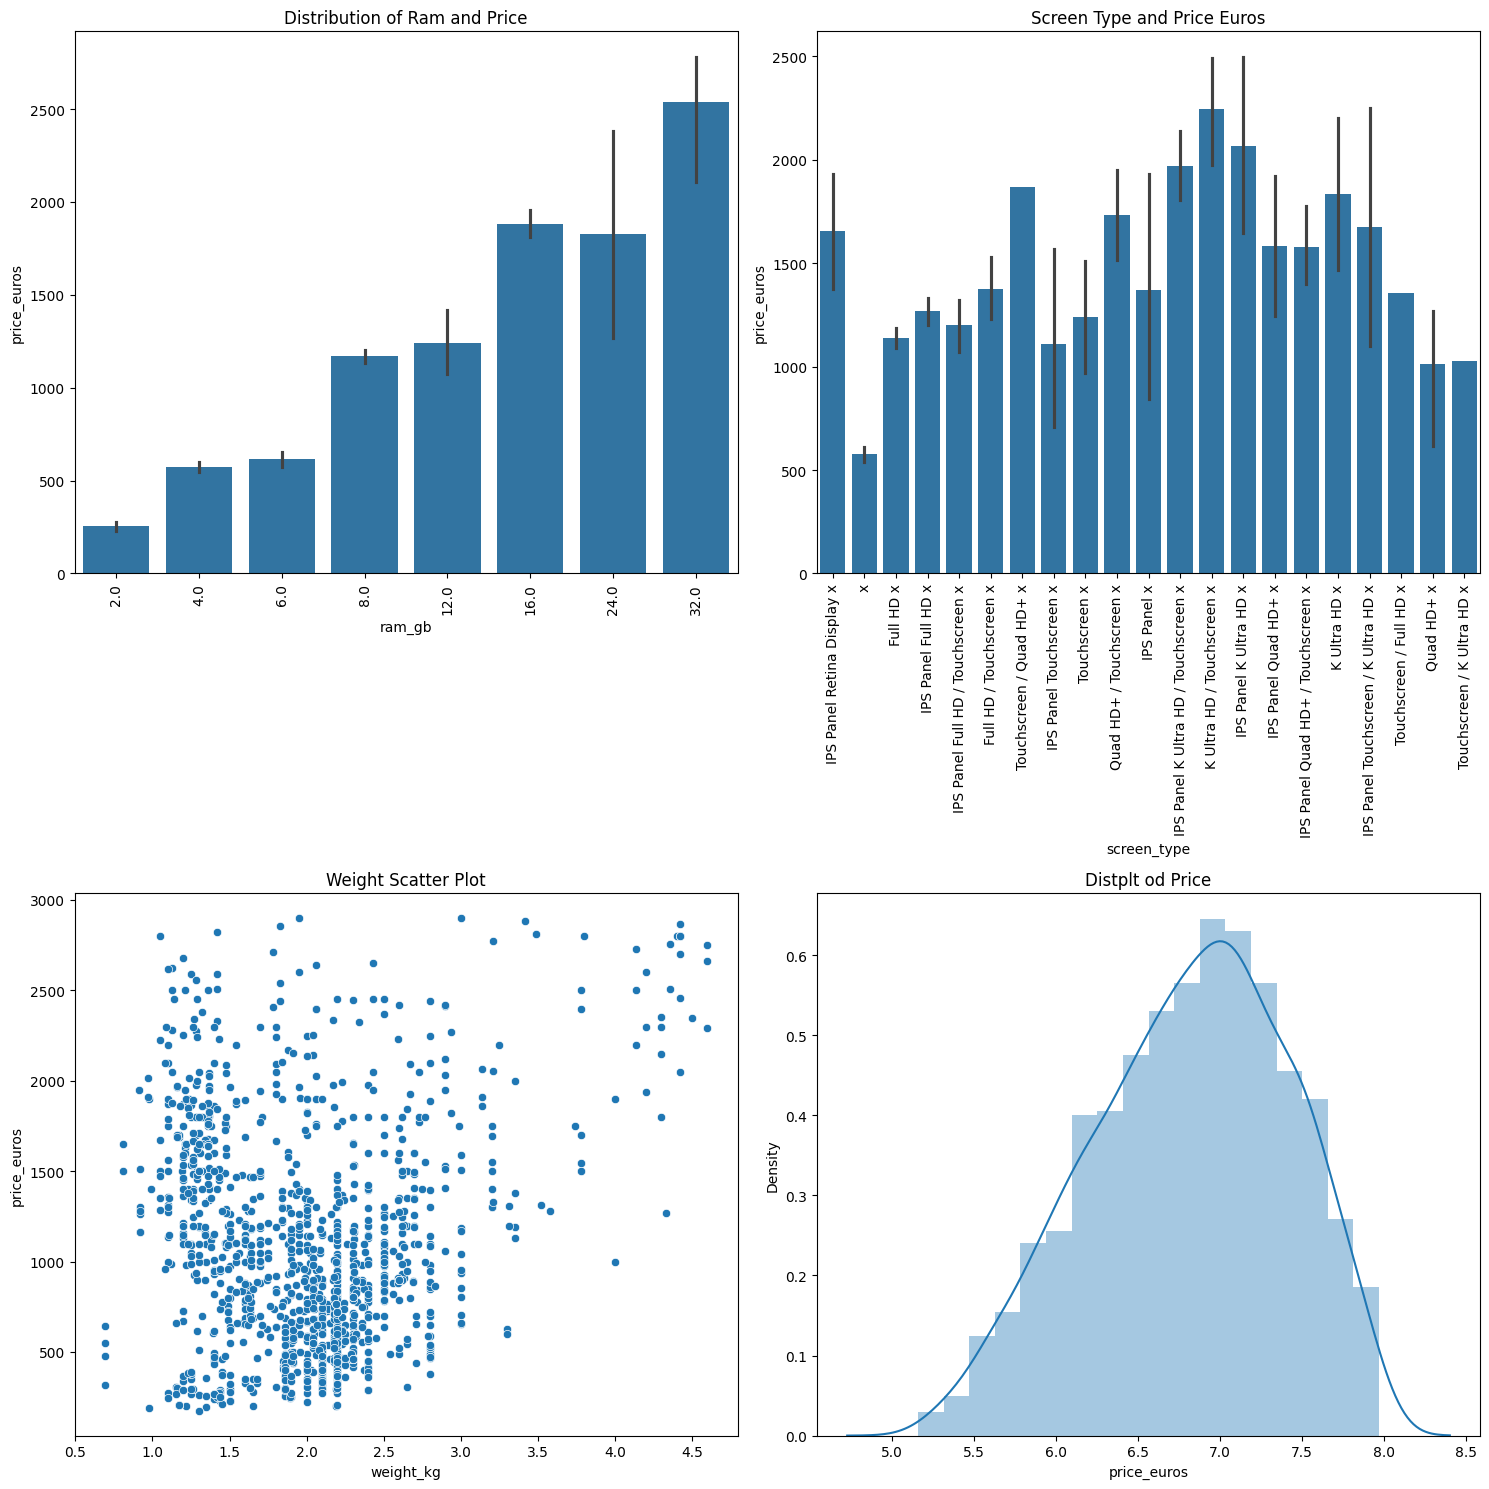

In [94]:
#size
plt.figure(figsize=(15, 15))

#plot 13
plt.subplot(2, 2, 1)
sns.barplot(x=df_clean['ram_gb'],y=df_clean['price_euros'])
plt.xticks(rotation='vertical')
plt.title('Distribution of Ram and Price')

#plot 14
plt.subplot(2, 2, 2)
sns.barplot(x=df_clean['screen_type'],y=df_clean['price_euros'])
plt.xticks(rotation='vertical')
plt.title('Screen Type and Price Euros')

#plot 15
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_clean['weight_kg'],y=df_clean['price_euros'])
plt.title('Weight Scatter Plot')

#plot 16
plt.subplot(2, 2, 4)
sns.distplot(np.log(df_clean['price_euros']))
plt.title('Distplt od Price')

#display
plt.tight_layout()
plt.show()

#corr

In [ ]:
df_clean.columns

Index(['company', 'type_name', 'inches', 'touch_screen', 'ips', 'cpu_vendor',
       'cpu_type', 'cpu_clock_speed', 'ram_gb', 'storage_gb', 'storage_type',
       'gpu_vendor', 'gpu_type', 'weight_kg', 'op_sys', 'price_euros',
       'x_resolution', 'y_resolution', 'ppi', 'screen_type'],
      dtype='object')

In [ ]:
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1303 non-null   object 
 1   type_name        1303 non-null   object 
 2   inches           1303 non-null   float64
 3   touch_screen     1303 non-null   int64  
 4   ips              1303 non-null   int64  
 5   cpu_vendor       1303 non-null   object 
 6   cpu_type         1303 non-null   object 
 7   cpu_clock_speed  1303 non-null   float64
 8   ram_gb           1303 non-null   float64
 9   storage_gb       1303 non-null   float64
 10  storage_type     1303 non-null   object 
 11  gpu_vendor       1303 non-null   object 
 12  gpu_type         1303 non-null   object 
 13  weight_kg        1303 non-null   float64
 14  op_sys           1303 non-null   object 
 15  price_euros      1303 non-null   float64
 16  x_resolution     1303 non-null   int64  
 17  y_resolution  

None

In [ ]:
#calculation of correlation matrix
corr_matrix = df_clean.corr()

display(corr_matrix)

<ipython-input-45-436a7316e700>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


,inches,touch_screen,ips,cpu_clock_speed,ram_gb,storage_gb,weight_kg,price_euros,x_resolution,y_resolution,ppi
inches,1.000000,-0.361735,-0.114804,0.307870,0.237993,0.269718,0.827631,0.068197,0.009815,-0.095404,-0.039311
touch_screen,-0.361735,1.000000,0.150512,-0.082579,0.116984,-0.031904,-0.294620,0.191226,0.226739,0.357930,0.252292
ips,-0.114804,0.150512,1.000000,0.063035,0.206623,-0.119641,0.016967,0.252208,0.136408,0.289030,0.146681
cpu_clock_speed,0.307870,-0.082579,0.063035,1.000000,0.368000,0.065000,0.320434,0.430293,0.076286,0.169668,0.053701
ram_gb,0.237993,0.116984,0.206623,0.368000,1.000000,0.016100,0.383874,0.743007,0.288638,0.424437,0.269155
storage_gb,0.269718,-0.031904,-0.119641,0.065000,0.016100,1.000000,0.180557,-0.125363,0.019965,-0.082495,0.009292
weight_kg,0.827631,-0.294620,0.016967,0.320434,0.383874,0.180557,1.000000,0.210370,0.050691,-0.053846,0.004656
price_euros,0.068197,0.191226,0.252208,0.430293,0.743007,-0.125363,0.210370,1.000000,0.363806,0.552809,0.351860
x_resolution,0.009815,0.226739,0.136408,0.076286,0.288638,0.019965,0.050691,0.363806,1.000000,0.738329,0.993665
y_resolution,-0.095404,0.357930,0.289030,0.169668,0.424437,-0.082495,-0.053846,0.552809,0.738329,1.000000,0.744112


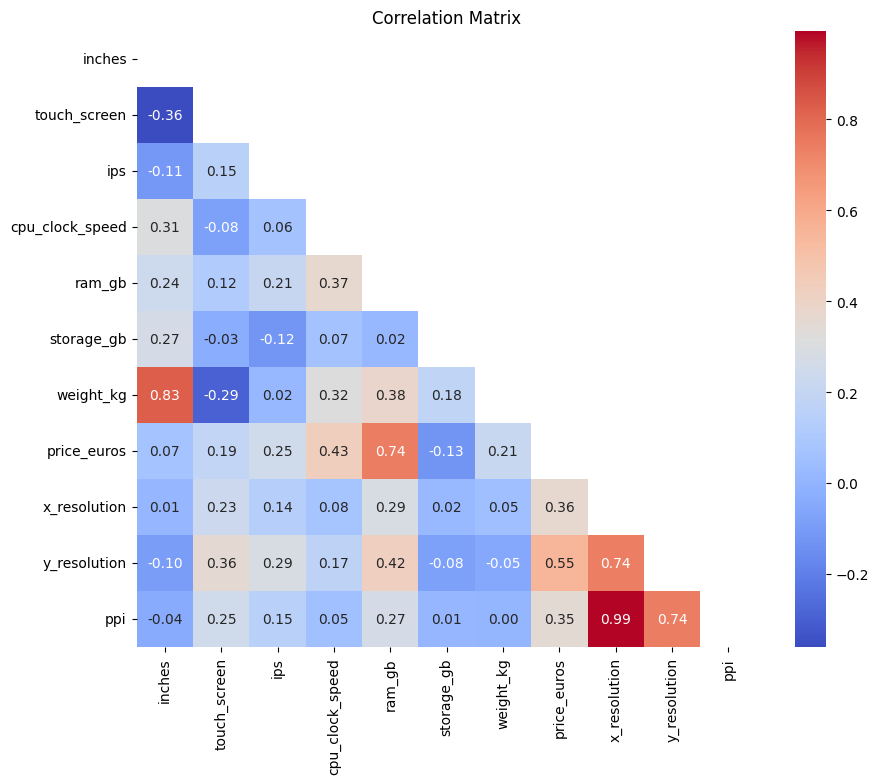

In [ ]:
#hide upper triangle
mask = np.triu(corr_matrix)

#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#for correlation matrix
correlation_matrix = df_clean.corr()

#show coefficients with the target variable 'price_euros'
correlation_with_price = correlation_matrix['price_euros']

display(correlation_with_price)

<ipython-input-47-9c4d7f1173d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


inches             0.068197
touch_screen       0.191226
ips                0.252208
cpu_clock_speed    0.430293
ram_gb             0.743007
storage_gb        -0.125363
weight_kg          0.210370
price_euros        1.000000
x_resolution       0.363806
y_resolution       0.552809
ppi                0.351860
Name: price_euros, dtype: float64

#outlier

In [ ]:
df_clean.describe()

,inches,touch_screen,ips,cpu_clock_speed,ram_gb,storage_gb,weight_kg,price_euros,x_resolution,y_resolution,ppi
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,0.147352,0.280123,2.298772,8.382195,447.809670,2.038734,1123.686992,3214.815042,1070.830391,233.585257
std,1.426304,0.354593,0.449231,0.506340,5.084665,366.037159,0.665475,699.009043,7515.455098,284.519410,502.100167
min,10.100000,0.000000,0.000000,0.900000,2.000000,8.000000,0.690000,174.000000,1366.000000,768.000000,90.580000
25%,14.000000,0.000000,0.000000,2.000000,4.000000,256.000000,1.500000,599.000000,1600.000000,900.000000,127.340000
50%,15.600000,0.000000,0.000000,2.500000,8.000000,256.000000,2.040000,977.000000,1920.000000,1080.000000,141.210000
75%,15.600000,0.000000,1.000000,2.700000,8.000000,512.000000,2.300000,1487.880000,1920.000000,1080.000000,157.350000
max,18.400000,1.000000,1.000000,3.600000,64.000000,2048.000000,4.700000,6099.000000,43840.000000,2160.000000,3511.450000


<Axes: title={'center': 'prices'}>

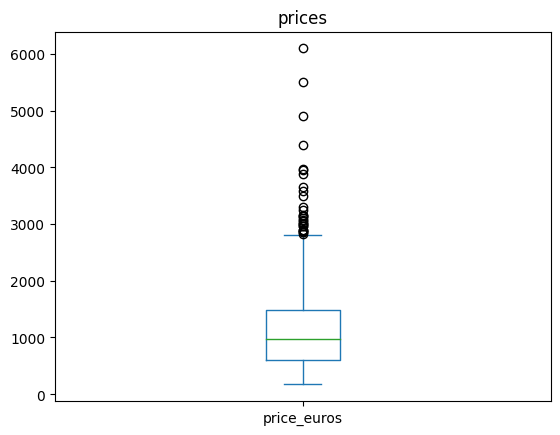

In [ ]:
#check before
df_clean['price_euros'].plot(kind='box', title='prices')

In [ ]:
#filer outliers
len(df_clean[df_clean['price_euros']>2900])

23

<Axes: title={'center': 'prices'}>

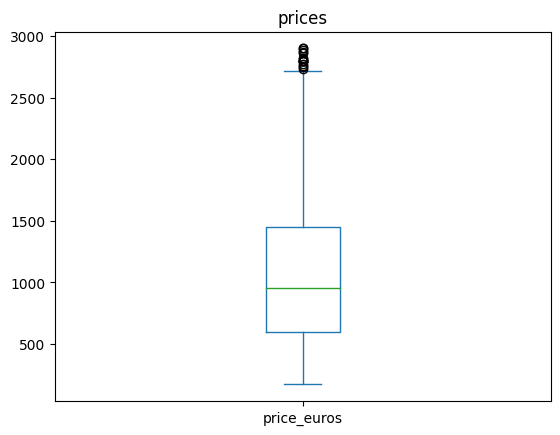

In [ ]:
#recheck
df_clean = df_clean[df_clean['price_euros']<2900].reset_index(drop=True)
df_clean['price_euros'].plot(kind='box', title='prices')

#transformation

In [ ]:
df_model = df_clean.copy()

In [ ]:
df_model.columns

Index(['company', 'type_name', 'inches', 'touch_screen', 'ips', 'cpu_vendor',
       'cpu_type', 'cpu_clock_speed', 'ram_gb', 'storage_gb', 'storage_type',
       'gpu_vendor', 'gpu_type', 'weight_kg', 'op_sys', 'price_euros',
       'x_resolution', 'y_resolution', 'ppi', 'screen_type'],
      dtype='object')

In [ ]:
#independent
X = df_model.loc[:,['company', 'type_name', 'cpu_vendor', 'gpu_vendor', 'op_sys']]
#dependent
y = df_model.loc[:,['price_euros']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X[['company', 'type_name','cpu_vendor','gpu_vendor','op_sys']])

OneHotEncoder()

In [ ]:
#to ensure consistency of categorical data in training and testing
all_categories = {
    'company': set(df_model['company']),
    'type_name': set(df_model['type_name']),
    'cpu_vendor': set(df_model['cpu_vendor']),
    'gpu_vendor': set(df_model['gpu_vendor']),
    'op_sys': set(df_model['op_sys'])
}

In [ ]:
#check testset for unknown categories and update all
for feature in ['company', 'type_name', 'cpu_vendor', 'gpu_vendor', 'op_sys']:
    unknown_categories = set(X[feature]) - all_categories[feature]
    if unknown_categories:
        print(f"Unknown categories in '{feature}': {unknown_categories}")
        # Add unknown categories to all_categories
        all_categories[feature].update(unknown_categories)

In [ ]:
#reinitialize OneHotEncoder with updated categories
ohe = OneHotEncoder(categories=[list(all_categories['company']),
                                list(all_categories['type_name']),
                                list(all_categories['cpu_vendor']),
                                list(all_categories['gpu_vendor']),
                                list(all_categories['op_sys']),
                                ],handle_unknown='ignore')

In [ ]:
from sklearn.compose import ColumnTransformer

#list of tuple for transformer
transformers = [
    ('one_hot_encoder', ohe, ['company', 'type_name','cpu_vendor','gpu_vendor','op_sys'])
]

#creation of column transformer
column_trans = ColumnTransformer(transformers, remainder='passthrough')

#model selection

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans, lr)

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2, random_state=1)

#check and verify shape of X and y
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#ensure samples number matches between X and y
assert X_train.shape[0] == y_train.shape[0], "Inconsistent number of samples between X_train and y_train"
assert X_test.shape[0] == y_test.shape[0], "Inconsistent number of samples between X_test and y_test"

X_train shape: (1024, 5)
y_train shape: (1024, 1)
X_test shape: (256, 5)
y_test shape: (256, 1)


pipeline

In [ ]:
#fit to pipeline
pipe.fit(X_train, y_train)

#predictions
y_pred = pipe.predict(X_test)

from sklearn.metrics import r2_score
#evaluate
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.49037871852940285


check best value for random state

In [ ]:
scores =[]
for i in range(1000):
  X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=i)
  pipe = make_pipeline(column_trans, lr)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  scores.append(r2_score(y_test,y_pred))

print(np.argmax(scores))
print(scores[np.argmax(scores)])

274
0.5935873029222304


decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=274)
pipe = make_pipeline(column_trans, dt)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.5466841748036032


random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=274)
pipe = make_pipeline(column_trans, dt)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.5466841748036032


In [ ]:
import pickle
pickle.dump(pipe, open('LaptopPricePredection.pkl','wb'))

#test

In [ ]:
X = df_model.drop(columns=['price_euros'])
y = np.log(df_model['price_euros'])

In [95]:
display(X)
display(X_train)
display(X_test)

,company,type_name,inches,touch_screen,ips,cpu_vendor,cpu_type,cpu_clock_speed,ram_gb,storage_gb,storage_type,gpu_vendor,gpu_type,weight_kg,op_sys,x_resolution,y_resolution,ppi
0,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus Graphics 640,1.37,macOS,2560,1600,226.98
1,Apple,Ultrabook,13.3,0,0,Intel,Intel Core i5,1.8,8.0,128.0,Flash Storage,Intel,HD Graphics 6000,1.34,macOS,1440,900,127.68
2,HP,Notebook,15.6,0,0,Intel,Intel Core i5 7200U,2.5,8.0,256.0,SSD,Intel,HD Graphics 620,1.86,No OS,1920,1080,141.21
3,Apple,Ultrabook,15.4,0,1,Intel,Intel Core i7,2.7,16.0,512.0,SSD,AMD,Radeon Pro 455,1.83,macOS,2880,1800,220.53
4,Apple,Ultrabook,13.3,0,1,Intel,Intel Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus Graphics 650,1.37,macOS,2560,1600,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,Lenovo,2 in 1 Convertible,14.0,1,1,Intel,Intel Core i7 6500U,2.5,4.0,128.0,SSD,Intel,HD Graphics 520,1.80,Windows 10,1920,1080,157.35
1276,Lenovo,2 in 1 Convertible,13.3,1,1,Intel,Intel Core i7 6500U,2.5,16.0,512.0,SSD,Intel,HD Graphics 520,1.30,Windows 10,3200,1800,276.05
1277,Lenovo,Notebook,14.0,0,0,Intel,Intel Celeron Dual Core N3050,1.6,2.0,64.0,Flash Storage,Intel,HD Graphics,1.50,Windows 10,1366,768,111.94
1278,HP,Notebook,15.6,0,0,Intel,Intel Core i7 6500U,2.5,6.0,1024.0,HDD,AMD,Radeon R5 M330,2.19,Windows 10,1366,768,100.45


,company,type_name,inches,touch_screen,ips,cpu_vendor,cpu_type,cpu_clock_speed,ram_gb,storage_gb,storage_type,gpu_vendor,gpu_type,weight_kg,op_sys,x_resolution,y_resolution,ppi
212,Huawei,Ultrabook,13.0,0,1,Intel,Intel Core i7 7500U,2.7,8.0,512.0,SSD,Intel,HD Graphics 620,1.05,Windows 10,2160,1440,199.69
67,HP,Notebook,14.0,0,0,Intel,Intel Celeron Dual Core N3060,1.6,4.0,32.0,SSD,Intel,HD Graphics 400,1.44,Windows 10,1366,768,111.94
807,Lenovo,Notebook,15.6,0,0,Intel,Intel Core i3 6006U,2.0,4.0,500.0,HDD,Intel,HD Graphics 520,2.10,Windows 10,1366,768,100.45
694,Lenovo,Notebook,15.6,0,0,Intel,Intel Core i5 7200U,2.5,4.0,1024.0,HDD + 1TB HDD,Intel,HD Graphics 620,2.10,Windows 10,1920,1080,141.21
95,Acer,2 in 1 Convertible,13.3,1,1,Intel,Intel Core i5 8250U,1.6,8.0,256.0,SSD,Intel,UHD Graphics 620,1.50,Windows 10,1920,1080,165.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Dell,2 in 1 Convertible,13.3,1,0,Intel,Intel Core i7 8550U,1.8,8.0,256.0,SSD,Intel,UHD Graphics 620,1.62,Windows 10,1920,1080,165.63
786,Dell,Notebook,15.6,0,0,Intel,Intel Core i3 6006U,2.0,8.0,256.0,SSD,AMD,Radeon R5 M420X,2.00,Windows 10,1920,1080,141.21
158,Dell,2 in 1 Convertible,15.6,1,0,Intel,Intel Core i7 8550U,1.8,8.0,256.0,SSD,Intel,UHD Graphics 620,1.56,Windows 10,1920,1080,141.21
19,Dell,Ultrabook,13.3,1,1,Intel,Intel Core i5 8250U,1.6,8.0,128.0,SSD,Intel,UHD Graphics 620,1.22,Windows 10,1920,1080,165.63


,company,type_name,inches,touch_screen,ips,cpu_vendor,cpu_type,cpu_clock_speed,ram_gb,storage_gb,storage_type,gpu_vendor,gpu_type,weight_kg,op_sys,x_resolution,y_resolution,ppi
877,Samsung,Ultrabook,15.0,0,0,Intel,Intel Core i7 7500U,2.7,8.0,256.0,SSD,Intel,HD Graphics 620,1.17,Windows 10,1920,1080,146.86
1072,Dell,Ultrabook,13.3,0,1,Intel,Intel Core i5 8250U,1.6,4.0,256.0,SSD,AMD,Radeon 530,1.40,Windows 10,1920,1080,165.63
85,Dell,Gaming,15.6,0,1,Intel,Intel Core i7 7700HQ,2.8,16.0,128.0,SSD + 1TB HDD,Nvidia,GeForce GTX 1050 Ti,2.65,Windows 10,1920,1080,141.21
1253,Dell,Notebook,15.6,0,0,Intel,Intel Core i3 7100U,2.4,6.0,1024.0,HDD,Intel,HD Graphics 620,2.30,Windows 10,1366,768,100.45
736,HP,Notebook,15.6,0,0,Intel,Intel Core i3 6006U,2.0,8.0,256.0,SSD,Intel,HD Graphics 520,1.86,Windows 10,1920,1080,141.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,HP,Notebook,15.6,0,0,Intel,Intel Core i7 6500U,2.5,8.0,256.0,SSD,Intel,HD Graphics 520,1.84,Windows 10,1920,1080,141.21
903,MSI,Gaming,15.6,0,0,Intel,Intel Core i5 7300HQ,2.5,8.0,128.0,SSD + 1TB HDD,Nvidia,GeForce GTX 1050,2.20,Windows 10,1920,1080,141.21
387,Asus,Gaming,17.3,0,0,Intel,Intel Core i7 7700HQ,2.8,16.0,256.0,SSD + 1TB HDD,Nvidia,GeForce GTX 1050 Ti,3.00,Windows 10,1920,1080,127.34
1028,MSI,Gaming,17.3,0,1,Intel,Intel Core i7 6820HK,2.7,16.0,256.0,SSD + 1TB HDD,Nvidia,GeForce GTX 980M,3.78,Windows 10,1920,1080,127.34


In [ ]:
display(y)
display(y_train)
display(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'screen_type' needs preprocessing
# You may need to handle other non-numeric columns similarly
# For demonstration, let's drop 'screen_type' for simplicity
X = df_model.drop(columns=['price_euros', 'screen_type'])
y = df_model['price_euros']

# Assuming 'screen_type' needs preprocessing
categorical_features = ['company', 'type_name', 'cpu_vendor', 'gpu_vendor', 'op_sys']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Avoids sparse matrix
    ('regressor', LinearRegression())
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444652)

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.5035614595698245


In [ ]:
print("Column indices:")
for i, col in enumerate(df_model.columns):
    print(f"{col}: {i}")

Column indices:
company: 0
type_name: 1
inches: 2
touch_screen: 3
ips: 4
cpu_vendor: 5
cpu_type: 6
cpu_clock_speed: 7
ram_gb: 8
storage_gb: 9
storage_type: 10
gpu_vendor: 11
gpu_type: 12
weight_kg: 13
op_sys: 14
price_euros: 15
x_resolution: 16
y_resolution: 17
ppi: 18
screen_type: 19
